In [23]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Newer versions
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time

# mute warning that assign columns on dataframe   eg,  df["col1"] = df["col11"]
pd.options.mode.chained_assignment = None  # default='warn'

## Read Files 

In [24]:
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)


# Split into attributes and class
y_df = whole_data["duration_label"]    #class df
x_df = whole_data.drop(['duration_label'], axis=1)    # features df

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))

X_train: (26800, 5) X_test: (13200, 5)


In [3]:
#
# random sample part of data for plotting use
sample_data = whole_data.sample(1000)
# Split into attributes and class
sample_y_df = sample_data["duration_label"]    #class df
sample_x_df = sample_data.drop(['duration_label'], axis=1)    # features df

# train test split
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_x_df, sample_y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(sample_X_train.shape, sample_X_test.shape))

X_train: (670, 5) X_test: (330, 5)


### Explore the relations between n_steps, n_ingredients  with Cooking Time

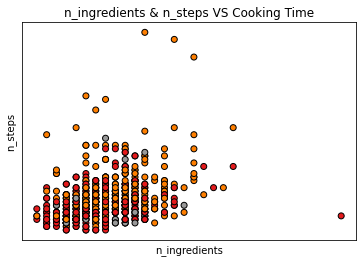

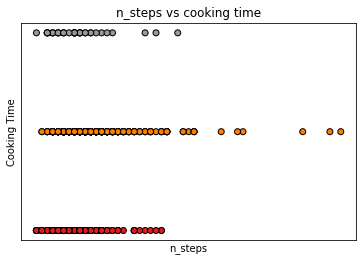

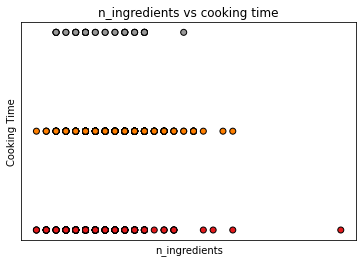

In [4]:
## Only Using n_steps and n_ingredients

# use random sample instead of full size to generate better graph
sample_X_train = sample_X_train.loc[:,["n_ingredients", "n_steps"]]

# Plot the training points
plt.scatter(sample_X_train["n_ingredients"], sample_X_train["n_steps"], c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('n_steps')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients & n_steps VS Cooking Time")
plt.show()

plt.scatter(sample_X_train["n_steps"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_steps')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_steps vs cooking time")
plt.show()

plt.scatter(sample_X_train["n_ingredients"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients vs cooking time")
plt.show()



As graph shown above, simply using n_ingredients and n_steps cannot do the classification,
for the reason that the numbers of steps / ingredients cannot form clear clusters to classify cooking time

### Only use n_steps and n_ingredients to do prediction

In [5]:
X_train = X_train[["n_steps", "n_ingredients"]]
X_train.head(3)
X_test = X_test[["n_steps", "n_ingredients"]]
X_test.head(3)

,n_steps,n_ingredients
32566,4,6
28547,10,15
6456,8,13


In [10]:
# From workshop 06, using SVM with linear SVM and cubic SVM to do the classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#print(cross_val_score(zero_r, X, y, cv=10))
X = X_train
y = y_train

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter

models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=50),
          svm.LinearSVC(C=C, max_iter = 200),]
          #svm.SVC(kernel='rbf', gamma=0.7, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',]
          #'SVM with a cubic kernel']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X,y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = cross_val_score(model, X, y, cv = 10).mean()

for title in titles:
    print(title, ': Training Acc', title_training_acc[title], '; X-Val Acc', title_crossvalidation_acc[title])
    

/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear fai

1-R : Training Acc 0.6235074626865672 ; X-Val Acc 0.62294776119403
1-Nearest Neighbour : Training Acc 0.5448507462686567 ; X-Val Acc 0.5225373134328358
5-Nearest Neighbour : Training Acc 0.6070149253731343 ; X-Val Acc 0.5878731343283582
Decision Tree : Training Acc 0.6463059701492537 ; X-Val Acc 0.632089552238806
LinearSVC : Training Acc 0.6087313432835821 ; X-Val Acc 0.5839925373134328


/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Overall, we found that the SVM method using only n_steps and n_ingredients doesn't perform well, as the result is close to 0-R baseline

## using Stacking Classifier

code from workshop 08

In [7]:


np.random.seed(1)

class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X):
        X_meta = self._predict_base(X)     
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)


classifiers = [DummyClassifier(strategy='most_frequent'),
               
          LogisticRegression(random_state=10),
          DecisionTreeClassifier(random_state=10),
          KNeighborsClassifier(),
          GaussianNB(),
        LogisticRegression(random_state=10)]
titles = ['Zero-R',
          'Logistic Regression',
          'Decision Tree',
          'KNN',
          'GaussianNB',
          'Logistic Regression']

meta_classifier = LogisticRegression()
stacker = StackingClassifier(classifiers, meta_classifier)
    

In [8]:
# Do prediction using stacking
for title, model in zip(titles, models):
    model.fit(X_train,y_train)
    start = time.time()
    acc = model.score(X_test, y_test)
    end = time.time()
    t = end-start
    print(title, "Accuracy:",acc, 'Time:', t)
stacker.fit(X_train, y_train)
print("\n\nTotal Performance:")
print('\nStacker Accuracy:', stacker.score(X_test, y_test))

Zero-R Accuracy: 0.6178787878787879 Time: 0.001562356948852539
Logistic Regression Accuracy: 0.5327272727272727 Time: 0.16385746002197266
Decision Tree Accuracy: 0.5956818181818182 Time: 0.1717977523803711
KNN Accuracy: 0.6304545454545455 Time: 0.0019271373748779297


/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GaussianNB Accuracy: 0.6165909090909091 Time: 0.0016396045684814453


Total Performance:

Stacker Accuracy: 0.6288636363636364


/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, using specific n_steps and n_ingredients may not be good enough

# Below not finished!
# ----------------------------------------------
## Load Vectorized Data and Use Neuron Network

In [34]:
## Loading training data that provided as vectorised


X_train = pd.read_csv(r"data/train_steps_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
y_train = whole_data["duration_label"]
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.294882,0.291131,0.779709,0.634566,-0.658954,-2.018979,0.366450,0.125453,0.778682,-0.738419,...,0.524914,-0.059248,-0.851974,-0.878965,0.110095,0.177768,-0.369561,0.355961,-0.481994,0.356241
1,0.752555,-1.072124,1.875412,0.247283,0.184581,1.093477,0.985011,-0.111624,-0.299318,-1.427524,...,-1.743889,0.805147,-0.825264,0.058763,1.868224,-1.211003,-2.073559,0.249009,-1.054287,-0.293384
2,0.002207,0.722088,0.810733,-0.191287,-1.167714,-1.248609,-1.362723,-1.567349,0.564916,0.984987,...,0.333650,-0.673702,-2.324360,0.687601,-0.939967,-1.561040,-0.732557,-0.939450,0.274603,-0.620148
3,-0.293604,0.393680,0.460519,0.049180,0.561528,-1.391731,-0.359667,-0.185326,1.303652,0.213302,...,0.607433,-0.018920,-2.685916,-0.463611,-0.059493,1.212257,-0.245923,-0.432690,-0.592135,0.654083
4,0.388302,0.030247,0.680402,-0.275467,0.248622,-0.108000,-0.078504,-0.457251,0.538187,-0.819404,...,0.214621,-0.520235,0.130486,0.211613,0.499143,0.743107,-0.426484,0.528443,-0.694904,0.264700


In [ ]:
from sklearn.neural_network import MLPClassifier
# USE DEEP LEARNING  Neuron Network

clf = MLPClassifier(max_iter=2000)
print('corss-val acc:', np.mean(cross_val_score(clf, X_train, y_train, cv=3)))

/home/lich2000117/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# Part1: Vectorise attribute "steps" for training and test data 

from sklearn.feature_extraction.text import CountVectorizer

# preprocess text and compute counts
train_steps_model = CountVectorizer(stop_words='english').fit(X_train)
test_steps_model = CountVectorizer(stop_words='english').fit(X_test)

# generate counts for a new set of documents
x_train_steps = train_steps_model.transform(X_train["steps"])
x_test_steps = test_steps_model.transform(X_train["steps"])

# check the number of words in vocabulary
print(len(X_train["steps"]))
# check the shape of sparse matrix
print(x_train_steps.shape)

# replace data onto dataframe
X_train.loc[:,"steps"]=x_train_steps
X_test["steps"]=x_test_steps

In [ ]:
# Part2: Vectorise attribute "ingredients" for training and test data 

from sklearn.feature_extraction.text import CountVectorizer

# preprocess text and compute counts
train_ingredients_model = CountVectorizer(stop_words='english').fit(X_train)
test_ingredients_model = CountVectorizer(stop_words='english').fit(X_test)

# generate counts for a new set of documents
x_train_ingredients = train_ingredients_model.transform(X_train["ingredients"])
x_test_ingredients = test_ingredients_model.transform(X_train["ingredients"])


# replace data onto dataframe
X_train["ingredients"]=x_train_ingredients
X_test["ingredients"]=x_test_ingredients

In [ ]:
print(X_test)

## Select k Best features for classification

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

x2 = SelectKBest(chi2,k=10)  # top k good features

X_train_x2 = x2.fit_transform(X_train,y_train)
X_test_x2 = x2.transform(X_test)

#Select Best Features for class features
for feat_num in x2.get_support(indices=True):
    print(vectoriser.get_feature_names()[feat_num])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

models = [GaussianNB(),
          MultinomialNB(),
          DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None)]

titles = ['GNB',
          'MNB',
          'one-r',
          '1-nearest neighbour',
          '5-nearest neighbour',
          'Decision Tree']

k = 10

x2 = SelectKBest(chi2, k=k)
x2.fit(X_train,y_train)
X_train_x2 = x2.transform(X_train)
X_test_x2 = x2.transform(X_test)


mi = SelectKBest(mutual_info_classif,k=k)
mi.fit(X_train,y_train)
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)


Xs = [(X_train, X_test), (X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]

X_names = ['complete', 'x2', 'mi']

for title, model in zip(titles, models):
    print('\n',title, '(with k=',k,'features):')
    for X_name, X in zip(X_names, Xs):
        X_train_t, X_test_t = X
        model.fit(X_train_t.todense(), y_train)
        acc = model.score(X_test_t.todense(), y_test)
        print(X_name, '\t acc',  acc)

In [ ]:
# Using Naive Bayes:
# Need Numeric Data ONLYs

import sklearn.naive_bayes as nb
##print(dir(nb))
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("GNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('Avg GNB score: {}'.format(np.mean(gnb_accs)))
print('Avg MNB score: {}'.format(np.mean(mnb_accs)))
print('Avg BNB score: {}'.format(np.mean(bnb_accs)))


# 
# Bibliograhy:
# 

Generating Personalized Recipes from Historical User Preferences. Bodhisattwa Prasad Majumder,
Shuyang Li, Jianmo Ni, Julian McAule+y, in Proceedings of the 2019 Conference on Empirical
Methods in Natural Language Processing and the 9th International Joint Conference on Natural
Language Processing (EMNLP-IJCNLP), 2019.